Welcome to my notebook! This is a copy/paste welcome message for all my notebooks :)
📓 This repository/notebook serves as a personal reminder for me, 
documenting code snippets and techniques sourced from various learning resources. 
The goal is to consolidate valuable information and create a basic reference guide. 
Please note that the codes included here are not originally mine, and credit goes 
to the respective authors and resources. Feel free to explore and 
use this collection as a shared learning space. Happy coding

#### Sources for this notebook : 
    * https://github.com/PacktPublishing/PyTorch-Computer-Vision-Cookbook/tree/master/Chapter09
    * STL-10 dataset from the torchvision package
    
#### Purpose :
    * GAN by Pytorch with STL-10 dataset.
    
#### Keywords :
    * basics of GAN

### Creating the Dataset

In [1]:
from torchvision import datasets
import torchvision.transforms as transforms
import os

# path to store/load data
path2data="./data_multiclass"

    

h, w = 64, 64
mean = (0.5, 0.5, 0.5)
std = (0.5, 0.5, 0.5)
transform= transforms.Compose([
           transforms.Resize((h,w)),
           transforms.CenterCrop((h,w)),
           transforms.ToTensor(),
           transforms.Normalize(mean, std)])
    
train_ds=datasets.STL10(path2data, split='train', 
                        download=False,
                        transform=transform)
print(len(train_ds))

5000


In [2]:
train_ds[0]

(tensor([[[ 0.1451,  0.1451,  0.1529,  ...,  0.2863,  0.2706,  0.2706],
          [ 0.1451,  0.1451,  0.1529,  ...,  0.3020,  0.2863,  0.2863],
          [ 0.1373,  0.1451,  0.1451,  ...,  0.3255,  0.3098,  0.3098],
          ...,
          [-0.0118, -0.0196, -0.0745,  ..., -0.0980,  0.0196,  0.0902],
          [ 0.0510, -0.0588, -0.0353,  ...,  0.0667,  0.0902,  0.1137],
          [ 0.0118, -0.1059,  0.0824,  ...,  0.0510,  0.0902,  0.0980]],
 
         [[ 0.1216,  0.1216,  0.1294,  ...,  0.2627,  0.2471,  0.2471],
          [ 0.1216,  0.1216,  0.1294,  ...,  0.2549,  0.2392,  0.2392],
          [ 0.1137,  0.1216,  0.1216,  ...,  0.2392,  0.2235,  0.2235],
          ...,
          [-0.1294, -0.1294, -0.2000,  ..., -0.2706, -0.0824, -0.0275],
          [-0.0667, -0.1686, -0.1608,  ..., -0.0118,  0.0275, -0.0118],
          [-0.1059, -0.2078, -0.0275,  ..., -0.0039,  0.0196,  0.0039]],
 
         [[-0.1373, -0.1373, -0.1294,  ...,  0.0039, -0.0118, -0.0118],
          [-0.1373, -0.1373,

In [3]:
import torch
for x, _ in train_ds:
    print(x.shape, torch.min(x), torch.max(x))
    break

torch.Size([3, 64, 64]) tensor(-0.8980) tensor(0.9529)


In [4]:
for x,y in train_ds:
    print(x.shape,y)
    break

torch.Size([3, 64, 64]) 1


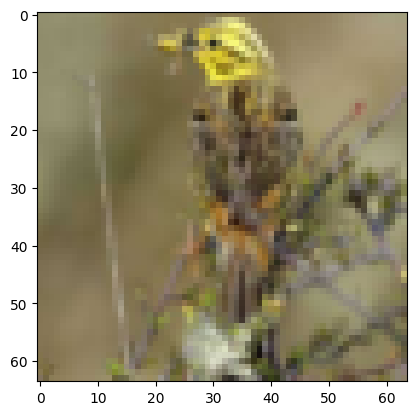

In [5]:
from torchvision.transforms.functional import to_pil_image
import matplotlib.pylab as plt


plt.imshow(to_pil_image(0.5*x+0.5))

In [6]:
import torch

batch_size = 32
train_dl = torch.utils.data.DataLoader(train_ds, 
                                       batch_size=batch_size, 
                                       shuffle=True)

In [7]:
for x,y in train_dl:
    print(x.shape, y.shape)
    break

torch.Size([32, 3, 64, 64]) torch.Size([32])


In [8]:
y

tensor([1, 9, 9, 7, 9, 8, 8, 7, 2, 3, 7, 0, 2, 4, 1, 9, 9, 2, 1, 1, 7, 5, 9, 2,
        0, 4, 4, 6, 3, 5, 5, 2])

### Defining Generator

In [9]:
from torch import nn
import torch.nn.functional as F

class Generator(nn.Module):
    def __init__(self, params):
        super(Generator, self).__init__()
        nz = params["nz"]
        ngf = params["ngf"]
        noc = params["noc"]
        self.dconv1 = nn.ConvTranspose2d( nz, ngf * 8, kernel_size=4,
                                         stride=1, padding=0, bias=False)
        self.bn1 = nn.BatchNorm2d(ngf * 8)
        self.dconv2 = nn.ConvTranspose2d(ngf * 8, ngf * 4, kernel_size=4, 
                                         stride=2, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(ngf * 4)
        self.dconv3 = nn.ConvTranspose2d( ngf * 4, ngf * 2, kernel_size=4, 
                                         stride=2, padding=1, bias=False)
        self.bn3 = nn.BatchNorm2d(ngf * 2)
        self.dconv4 = nn.ConvTranspose2d( ngf * 2, ngf, kernel_size=4, 
                                         stride=2, padding=1, bias=False)
        self.bn4 = nn.BatchNorm2d(ngf)
        self.dconv5 = nn.ConvTranspose2d( ngf, noc, kernel_size=4, 
                                         stride=2, padding=1, bias=False)

    def forward(self, x):
        x = F.relu(self.bn1(self.dconv1(x)))
        x = F.relu(self.bn2(self.dconv2(x)))            
        x = F.relu(self.bn3(self.dconv3(x)))        
        x = F.relu(self.bn4(self.dconv4(x)))    
        out = torch.tanh(self.dconv5(x))
        return out

In [10]:
params_gen = {
        "nz": 100,
        "ngf": 64,
        "noc": 3,
        }
model_gen = Generator(params_gen)
device = torch.device("cuda")
model_gen.to(device)
print(model_gen)

Generator(
  (dconv1): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dconv2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dconv3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dconv4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dconv5): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
)


In [12]:
with torch.no_grad():
    y= model_gen(torch.zeros(1,100,1,1, device=device))
print(y.shape)

torch.Size([1, 3, 64, 64])


### Defining Discriminator

In [13]:
class Discriminator(nn.Module):
    def __init__(self, params):
        super(Discriminator, self).__init__()
        nic= params["nic"]
        ndf = params["ndf"]
        self.conv1 = nn.Conv2d(nic, ndf, kernel_size=4, stride=2, padding=1, bias=False)
        self.conv2 = nn.Conv2d(ndf, ndf * 2, kernel_size=4, stride=2, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(ndf * 2)            
        self.conv3 = nn.Conv2d(ndf * 2, ndf * 4, kernel_size=4, stride=2, padding=1, bias=False)
        self.bn3 = nn.BatchNorm2d(ndf * 4)
        self.conv4 = nn.Conv2d(ndf * 4, ndf * 8, kernel_size=4, stride=2, padding=1, bias=False)
        self.bn4 = nn.BatchNorm2d(ndf * 8)
        self.conv5 = nn.Conv2d(ndf * 8, 1, kernel_size=4, stride=1, padding=0, bias=False)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x), 0.2, True)
        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2, inplace = True)
        x = F.leaky_relu(self.bn3(self.conv3(x)), 0.2, inplace = True)
        x = F.leaky_relu(self.bn4(self.conv4(x)), 0.2, inplace = True)        
        
        out = torch.sigmoid(self.conv5(x))
        return out.view(-1)

In [14]:
params_dis = {
    "nic": 3,
    "ndf": 64}
model_dis = Discriminator(params_dis)
model_dis.to(device)
print(model_dis)

Discriminator(
  (conv1): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [15]:
with torch.no_grad():
    y= model_dis(torch.zeros(1,3,h,w, device=device))
print(y.shape)    

torch.Size([1])


In [16]:
def initialize_weights(model):
    classname = model.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(model.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(model.weight.data, 1.0, 0.02)
        nn.init.constant_(model.bias.data, 0)

In [17]:
model_gen.apply(initialize_weights);
model_dis.apply(initialize_weights);

### Defining Loss, Optimizer

In [18]:
loss_func = nn.BCELoss()

In [19]:
from torch import optim

lr = 2e-4 
beta1 = 0.5
opt_dis = optim.Adam(model_dis.parameters(), lr=lr, betas=(beta1, 0.999))

In [20]:
opt_gen = optim.Adam(model_gen.parameters(), lr=lr, betas=(beta1, 0.999))

### Training

In [24]:
real_label = 1
fake_label = 0
nz = params_gen["nz"]
num_epochs = 100


loss_history={"gen": [],
              "dis": []}

batch_count = 0
for epoch in range(num_epochs):
    for xb, yb in train_dl:
        ba_si = xb.size(0)
        model_dis.zero_grad()
        xb = xb.to(device)
        yb = torch.full((ba_si,), real_label, device=device)
        out_dis = model_dis(xb)
        loss_r = loss_func(out_dis, yb.float())
        loss_r.backward()

        noise = torch.randn(ba_si, nz, 1, 1, device=device)
        out_gen = model_gen(noise)
        out_dis = model_dis(out_gen.detach())
        yb.fill_(fake_label)    
        loss_f = loss_func(out_dis, yb.float())
        loss_f.backward()
        loss_dis = loss_r + loss_f  
        opt_dis.step()   

        model_gen.zero_grad()
        yb.fill_(real_label)  
        out_dis = model_dis(out_gen)
        loss_gen = loss_func(out_dis, yb.float())
        loss_gen.backward()
        opt_gen.step()

        loss_history["gen"].append(loss_gen.item())
        loss_history["dis"].append(loss_dis.item())
        batch_count += 1
        if batch_count % 100 == 0:
            print(epoch, loss_gen.item(),loss_dis.item())

0 12.098336219787598 0.04561376944184303
1 5.001667022705078 0.4061702489852905
1 10.832709312438965 0.3457016944885254
2 3.467670440673828 0.29012584686279297
3 4.031991958618164 0.2978331446647644
3 5.481451034545898 0.10106769949197769
4 3.4294533729553223 0.5481485724449158
5 4.634278297424316 0.16948768496513367
5 3.6936798095703125 0.32135486602783203
6 8.251289367675781 0.6920521259307861
7 7.115721225738525 1.1212002038955688
7 6.198087692260742 0.16646625101566315
8 3.8712050914764404 0.3128295838832855
8 3.1902832984924316 0.4107312560081482
9 5.081296920776367 0.14200972020626068
10 7.062032222747803 0.7379525899887085
10 6.528390884399414 0.5675998330116272
11 5.260968208312988 0.38371720910072327
12 10.719165802001953 1.5917893648147583
12 4.920510292053223 0.19021308422088623
13 4.278288841247559 0.49657803773880005
14 4.242774963378906 0.638015627861023
14 6.095643043518066 0.7987418174743652
15 3.918081760406494 0.3757237195968628
15 2.495737075805664 1.00625741481781
1

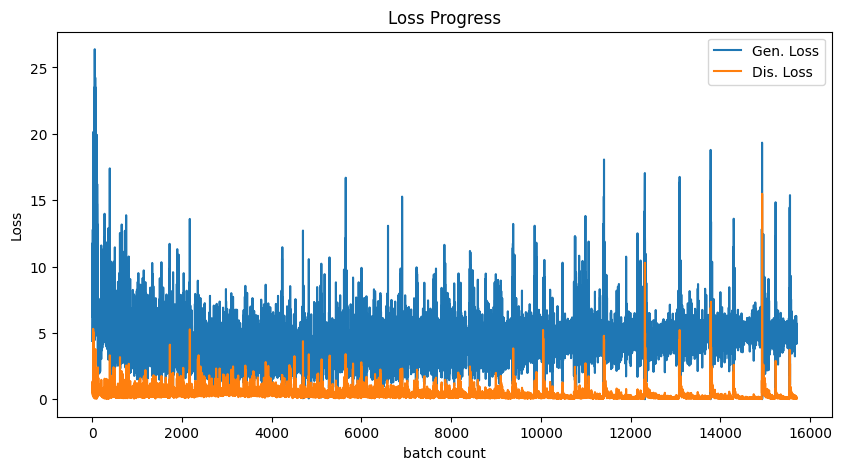

In [25]:
plt.figure(figsize=(10,5))
plt.title("Loss Progress")
plt.plot(loss_history["gen"],label="Gen. Loss")
plt.plot(loss_history["dis"],label="Dis. Loss")
plt.xlabel("batch count")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [26]:
# store models
import os
path2models = "./models_GAN/"

path2weights_gen = os.path.join(path2models, "weights_gen_128.pt")
path2weights_dis = os.path.join(path2models, "weights_dis_128.pt")

torch.save(model_gen.state_dict(), path2weights_gen)
torch.save(model_dis.state_dict(), path2weights_dis)

### Deploying Generator

In [27]:
weights = torch.load(path2weights_gen)
model_gen.load_state_dict(weights)
model_gen.eval()

Generator(
  (dconv1): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dconv2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dconv3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dconv4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dconv5): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
)

torch.Size([16, 100, 1, 1])
torch.Size([16, 3, 64, 64])


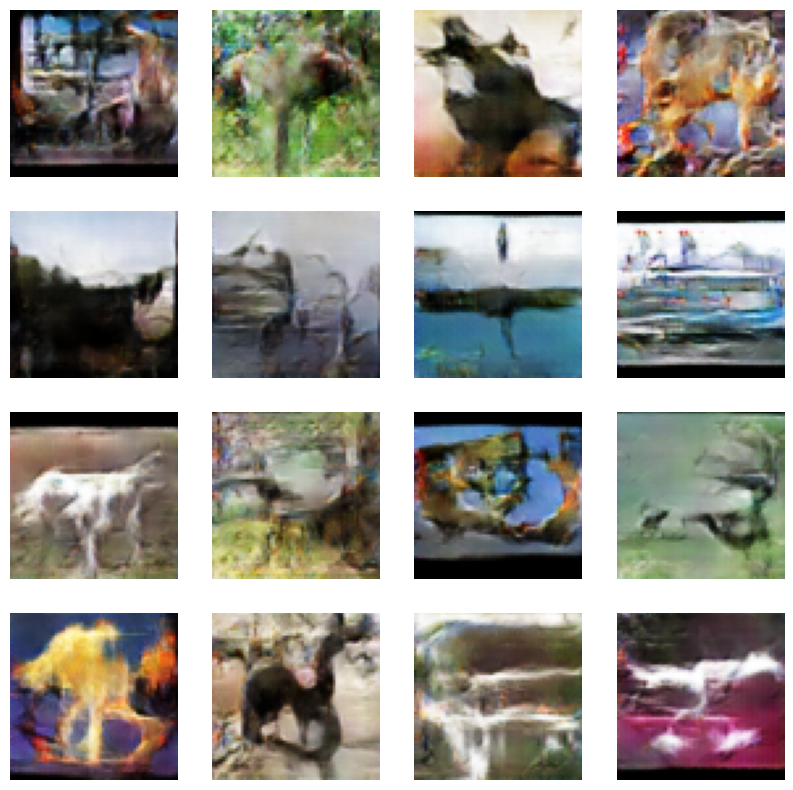

In [28]:
import numpy as np

with torch.no_grad():
    fixed_noise = torch.randn(16, nz, 1, 1, device=device)
    print(fixed_noise.shape)
    img_fake = model_gen(fixed_noise).detach().cpu()    
print(img_fake.shape)

plt.figure(figsize=(10,10))
for ii in range(16):
    plt.subplot(4,4,ii+1)
    plt.imshow(to_pil_image(0.5*img_fake[ii]+0.5))
    plt.axis("off")